# Analítica de Negocios y Ciencia de Datos

## CIDE - Otoño 2015

### Modelos no lineales

# Referencias

El modelo no lineal de regresión se puede encontrar en [Greene](http://pages.stern.nyu.edu/~wgreene/Text/econometricanalysis.htm), Cap. 7.

Los modelos generalizados aditivos (GAMS) y temas relacionados se encuentran en el capítulo 7 de [ISL](http://www-bcf.usc.edu/~gareth/ISL/) y capítulos 5 y 9 de [ESL](http://statweb.stanford.edu/~tibs/ElemStatLearn.1stEd/)

# Modelos lineales y no lineales


* Hasta ahora nos hemos movido en el mundo lineal.


* OLS asume que la función que queremos aprender es lineal en los parámetros $f(x) = x'\beta$.


* Aunque ya vimos que por OLS podemos estimar cualquier modelo que tenga la siguiente forma

$$
f(x) = g(x)'\beta
$$



* En el mundo de modelos de clasificación vimos el modelo lineal de probabilidad, y los modelos Logit.


* Aunque los segundos no son lineales, una transformación rápida permite ver que el *log-odds* es lineal en los párametros

$$
\ln \left(\frac{Prob(D=1 | X)}{Prob(D=0 | X)} \right) = \ln \left(\frac{e^{x'\beta}/(1+e^{x'\beta})}{1/(1+e^{x'\beta})} \right) = x'\beta
$$



# Modelos de regresión no lineales

* La clase de modelos que vamos a analizar ahora se pueden escribir como


$$
y_i = h(\mathbf{x}_i, \mathbf{\beta}) + \epsilon_i
$$

Siguiendo a Greene, vamos a definir:

> ** Un modelo no lineal es aquel para el que las condiciones de primer orden de la minimización por mínimos cuadrados son funciones no lineales de los parámetros.**


En sus cursos de econometría verán que hay que imponer ciertos supuestos para que todo funcione bien.  Acá los menciono únicamente.  Pueden encontrar mayor información en Greene.

* **Supuesto 1**: forma funcional de la esperanza condicional:
$$
    E[y_i|x_i] = h(x_i,\beta) \hspace{3mm}\text{para $i=1,\cdots, N$}
$$


* **Supuesto 2**: Los parámetros son identificables
$$
\beta^0 \neq \beta \implies h(\mathbf{x}_i,\beta^0) \neq h(\mathbf{x}_i,\beta) \hspace{3mm}\text{para todo $\mathbf{x}_i$}
$$


* **Supuesto 3**: Errores con media cero
$$
E[\epsilon_i|h(\mathbf{x}_i,\beta)] = 0
$$


* **Supuesto 4**: Homoscedasticidad y no autocorrelación *condicional* de los errores.


* **Supuesto 5**: exogeneidad de $\mathbf{x}_i$ y los errores. 


# El modelo linealizado


* Cuando estudiamos el modelo Logit, vimos que es fácil de resolver haciendo una aproximación de primer orden de las condiciones de primer orden.


* Acá vamos a hacer lo mismo pero con la función $h(\mathbf{x}_i,\beta)$


$$
h(\mathbf{x},\beta) \approx h(\mathbf{x},\beta^0) + \sum_{p=1}^{P+1} \frac{\partial h(\mathbf{x},\beta^0)}{\partial \beta_p} (\beta_p - \beta^0_{p})
$$


* Igual que antes, vamos a asumir que $\beta_0$ lo conocemos, así que agrupando, tenemos


$$
h(\mathbf{x},\beta) \approx \left[ h(\mathbf{x},\beta^0) - \sum_{p=1}^{P+1} \frac{\partial h(\mathbf{x},\beta^0)}{\partial \beta_p} \beta^0_{p} \right] + \sum_{p=1}^{P+1} \frac{\partial h(\mathbf{x},\beta^0)}{\partial \beta_p} \beta_p
$$


* Definamos $x^0_p = \frac{\partial h(\mathbf{x},\beta^0)}{\partial \beta_p}$, así que

$$
\begin{eqnarray*}
h(\mathbf{x},\beta) &\approx& \left[ h(\mathbf{x},\beta^0) - \sum_{p=1}^{P+1} x^0_p \beta^0_{p} \right] + \sum_{p=1}^{P+1} x^0_p \beta_p \\
&=& (h^0  - {\mathbf{x}^0}' \beta^0) + {\mathbf{x}^0}' \beta
\end{eqnarray*}
$$


# El modelo linealizado (cont.)


* Así que

$$
\begin{eqnarray*}
y - y^0 &\approx& {\mathbf{x}^0}'\beta + \epsilon \\
&=& {\mathbf{x}^0}'\beta + \epsilon^0
\end{eqnarray*}
$$

donde $y^0 := h^0 - {\mathbf{x}^0}'\beta^0$, y $\epsilon^0$ contiene el término de error estocástico, y el error en la aproximación de Taylor.


> **La buena noticia es que si tenemos $\beta^0$, podemos estimar $\beta$ en una regresión lineal**.

* Este procedimiento debre sonar familiar ya: ¿cuál puede ser $\beta^0$?



# Actualización de Newton:

* Ya sabemos que la estimación actual se puede estimar por OLS:

$$
\begin{eqnarray*}
\beta_{(k)} &=& ({X^0}'X^0)^{-1}{X^0}'(y-y0)\\
&=& ({X^0}'X^0)^{-1}{X^0}'(y-h^0 + X^0 \beta_{(k-1)}) \\
&=& \beta_{(k)} + \Delta_k
\end{eqnarray*}
$$

* donde $X^0$ es la matriz de **seudoregresores** que se obtiene así

$$
x^0_{ip} = \frac{\partial h(\mathbf{x}_i,\beta_{(k-1)})}{\partial \beta_p}
$$

y hay que tener cuidado porque $\Delta_k = \Delta_k(\beta_{(k)})$


* No vamos a decir más sobre este tema.  


* Pero es un método que es fácil de ejecutar (ya han tenido que programar cosas más difíciles) así que ya debe estar en su caja de herramientas.

# No linealidad y bases polinomiales


* Ya vimos que la función que deseamos aprender $f(x)$ se puede aproximar por medio de una base de polinomios:

$$
\{1, x_1, \cdots, x_p, x_1^2, \cdots, x_p^2, x_1 x_2, \cdots \}
$$


* En la práctica es usual utilizar hasta polinomios de grado dos o tres con las respectivas interacciones.


* Este método es flexible y generalmente funciona bien, pero a medida que incrementamos el orden de los polinomios tendemos a perder muchos grados de libertad.


* Las personas interesadas pueden ver, por ejemplo, el [Cap.76 del Handbook of Econometrics](http://www.sciencedirect.com/science/article/pii/S157344120706076X)

# Expansiones más generales

* En general, podemos aproximar $f(x)$ así

$$
f(X) = \sum_{m=1}^M \beta_m h_m(X)
$$


* Donde las funciones $\{h_m()\}$ es una base de funciones que aproxima la función $f(x)$.


* Alternativamente podemos hacer una interpolación polinomial a trozos (piecewise polynomial).

# Piecewise polynomials

* Una interpolación a trozos se obtiene al dividir el dominio de la función en intervalos contiguos.


* En cada intervalo se ajusta un polinomio diferente.


* Por ejemplo, si dividemos el dominio con dos puntos de corte $\xi_1, \xi_2$, una interpolación constante se obtiene así:

$$
\begin{eqnarray*}
h_1(X) &=& I(X<\xi_1)\\
h_2(X) &=& I(\xi_1 \geq X \geq \xi_2)\\
h_3(X) &=& I(X\geq \xi_2)\\
\end{eqnarray*}
$$


* En estos casos, $\hat{\beta}_k = \overline{y}_{I_k}$.

donde $I_k$ es la correspondiente variable indicadora definida arriba.


* Pero cómo lo estimamos?


* **Método 1**: Tres regresiones. $y_i = \beta_k I_{ik} + \epsilon_i$


* **Método 2**: Una regresión:  $y_i = \beta_1 I_{i1} + \beta_2 I_{i2} + \beta_3 I_{i3} + \epsilon_i$

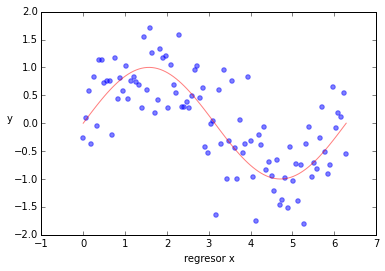

In [1]:
# Simulemos un modelo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(6181015)

# vamos a simular una función trigonométrica
N = 100
x = np.linspace(0,2*np.pi,N).reshape((N,1))
eps = 0.5*np.random.randn(N,1)
y = np.sin(x) + eps
plt.scatter(x,y, color='b',alpha=0.5)
plt.plot(x,np.sin(x), color='r', alpha=0.5)
plt.xlabel('regresor x')
plt.ylabel('y', rotation=0)

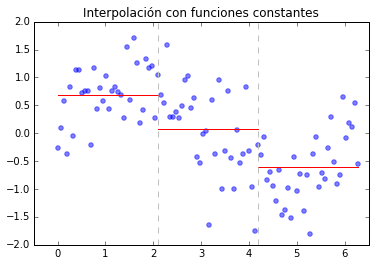

In [2]:
# Dividamos el dominio en tres intervalos iguales
pctiles = np.percentile(x, [33.3,66.6])
# booleanos para obtener la interpolación
ind1    = x<pctiles[0]
ind2    = np.logical_and(x>=pctiles[0],x<=pctiles[1])
ind3    = x>pctiles[1]
# Obtengamos la interpolación
h1 = y[ind1].mean()
h2 = y[ind2].mean()
h3 = y[ind3].mean()
plt.scatter(x,y, color='b',alpha=0.5)
# primera función
plt.plot([x.min(), pctiles[0]],[h1,h1], color='r')
# segunda función
plt.plot([pctiles[0],pctiles[1]],[h2,h2], color='r')
# tercera función
plt.plot([pctiles[1],x.max()],[h3,h3], color='r')
# las líneas divisorias
plt.plot([pctiles[0],pctiles[0]],[-2,2],ls='--', color='0.75')
plt.plot([pctiles[1],pctiles[1]],[-2,2],ls='--', color='0.75')
plt.axis([-0.5,6.5,-2,2])
plt.title(u'Interpolación con funciones constantes')

# Interpolación con polinomios de orden uno


* La anterior interpolación es útil, pero podemos hacer algo mejor.


* Queremos buscar funciones $h_k(X) = \alpha_k + \beta_k X$, así que podemos hacer regresiones lineales en cada intervalo.


* O podemos hacer una única regresión:

$$
y_i = \alpha_0 + \alpha_1 X_i + \sum_{k=1}^{K-1} \beta_k D_{ik} + \sum_{k=1}^{K-1} \delta_k D_{ik} X_{i} + \epsilon_i 
$$

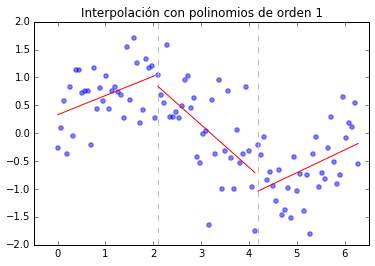

In [4]:
import sys
#sys.path.append('//Users//danielvaughan//Documents//Python Scripts//')
sys.path.append('C:\\Users\\a3940004.EDIFICIOS\\Documents\\Python Scripts\\')
import olsdan as ols

plt.scatter(x,y, color='b',alpha=0.5)
# las líneas divisorias
plt.plot([pctiles[0],pctiles[0]],[-2,2],ls='--', color='0.75')
plt.plot([pctiles[1],pctiles[1]],[-2,2],ls='--', color='0.75')
plt.axis([-0.5,6.5,-2,2])
plt.title(u'Interpolación con polinomios de orden 1')
# ahora vamos a hacer regresiones lineales en cada uno
ind_mat = np.concatenate((ind1.reshape((N,1)),
                         ind2.reshape((N,1)),
                         ind3.reshape((N,1))),axis=1)
for i in range(3):
    # la variable dependiente
    y_i = y[ind_mat[:,i]]
    n_i = y_i.shape[0]
    y_i = y_i.reshape((n_i,1))
    x_i = x[ind_mat[:,i]].reshape((n_i,1))
    # la matrix x
    xmat_i = np.concatenate((np.ones((n_i,1)), x_i),axis=1)
    # obtengamos la estimación 
    olsi = ols.ols_dan(y_i, xmat_i)
    premat = pd.DataFrame(np.concatenate((olsi.xmat[:,1], olsi.yest()),axis=1), 
                          columns=['x','yhat']).sort(columns=['x'], ascending=True)
    plt.plot(premat.x, premat.yhat, color='r')
    

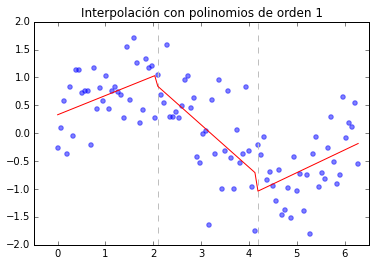

In [6]:
# pero no tenemos que hacer tres regresiones
plt.scatter(x,y, color='b',alpha=0.5)
# las líneas divisorias
plt.plot([pctiles[0],pctiles[0]],[-2,2],ls='--', color='0.75')
plt.plot([pctiles[1],pctiles[1]],[-2,2],ls='--', color='0.75')
plt.axis([-0.5,6.5,-2,2])
plt.title(u'Interpolación con polinomios de orden 1')
# ahora vamos a hacer regresiones lineales en cada uno
ind_mat = np.concatenate((ind1.reshape((N,1)),
                         ind2.reshape((N,1)),
                         ind3.reshape((N,1))),axis=1)
# tenemos que incluir las dummies y las interacciones
# Cuidado: broadcasting
int_mat = ind_mat*x.reshape((N,1))
xmat = np.concatenate((np.ones((N,1)),ind_mat, int_mat), axis=1)
olsx = ols.ols_dan(y,xmat)

plt.plot(x,olsx.yest(), color='r')

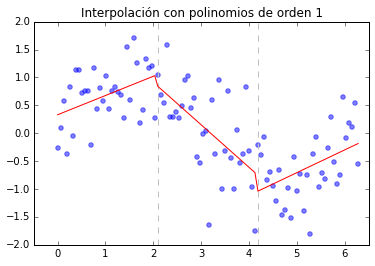

In [8]:
# Alternativamente podemos dejar el grupo 1 como grupo base o de referencia

plt.scatter(x,y, color='b',alpha=0.5)
# las líneas divisorias
plt.plot([pctiles[0],pctiles[0]],[-2,2],ls='--', color='0.75')
plt.plot([pctiles[1],pctiles[1]],[-2,2],ls='--', color='0.75')
plt.axis([-0.5,6.5,-2,2])
plt.title(u'Interpolación con polinomios de orden 1')
# dejemos el grupo 1 como base
ind_mat = np.concatenate((
                         ind2.reshape((N,1)),
                         ind3.reshape((N,1))),axis=1)
# tenemos que incluir las dummies y las interacciones
# Cuidado: broadcasting
int_mat = ind_mat*x.reshape((N,1))
xmat = np.concatenate((np.ones((N,1)),x.reshape((N,1)), ind_mat, int_mat), axis=1)
olsx = ols.ols_dan(y,xmat)

plt.plot(x,olsx.yest(), color='r')

# ¿Podemos restringir a que sea continua?

* La anterior regresión que incluimos fue
$$
y = \alpha_0 + \alpha_1 X + \beta_1 I_2 + \beta_2 I_3 + \delta_1 (I_2\times X) + \delta_2 (I_3\times X) + \epsilon
$$
donde $I_k$ es la variable indicadora correspondiente.


* ¿Qué restricciones hay que imponer para que sea continua?


* Tomemos el primer caso:  En el primer intervalo $I_2 = I_3 = 0$.  En el segundo $I_3=0$

$$
\begin{eqnarray*}
\alpha_0 + \alpha_1 \xi_1 &=& (\alpha_0 + \beta_1) + (\alpha_1 + \delta_1) \xi_1 \\
&\iff& \beta_1 = -\delta_1 \xi_1
\end{eqnarray*}
$$

* En el segundo caso pueden verificar que:
$$
\beta_2 = \delta_1 \underbrace{(\xi_2 - \xi_1)}_{\Delta_{21}} - \delta_2 \xi_2
$$


* Incluyamos estas restricciones:
$$
\begin{eqnarray*}
y &=& \alpha_0 + \alpha_1 X + \beta_1 I_2 + \beta_2 I_3 + \delta_1 (I_2\times X) + \delta_2 (I_3\times X) + \epsilon\\
&=& \alpha_0 + \alpha_1 X + (-\delta_1 \xi_1) I_2 + (\delta_1 \Delta_{21} - \delta_2 \xi_2) I_3 + \delta_1 (I_2\times X) + \delta_2 (I_3\times X) + \epsilon\\
&=& \eta_0 + \eta_1 X +  \eta_2 I_2 (X-\xi_1) + \eta_3 I_3 (X - \xi_2) + \epsilon\\
&=& \eta_0 + \eta_1 X +  \eta_2 (X-\xi_1)_+ + \eta_3 (X - \xi_2)_+ + \epsilon\\ 
\end{eqnarray*}
$$


* Así que para incluir las restricciones sólo tenemos que cambiar la base original por:
$$
h_1(X) = 1, \hspace{2mm} h_2(X) = X,  \hspace{2mm} h_3(X) = (X-\xi_1)_+, \hspace{2mm} h_4(X) = (X-\xi_2)_+
$$


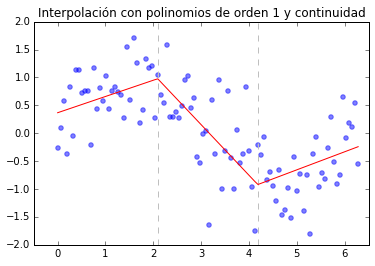

In [33]:
# Alternativamente podemos dejar el grupo 1 como grupo base o de referencia

plt.scatter(x,y, color='b',alpha=0.5)
# las líneas divisorias
plt.plot([pctiles[0],pctiles[0]],[-2,2],ls='--', color='0.75')
plt.plot([pctiles[1],pctiles[1]],[-2,2],ls='--', color='0.75')
plt.axis([-0.5,6.5,-2,2])
plt.title(u'Interpolación con polinomios de orden 1 y continuidad')
# Construyamos las nuevas bases
dum_1 = x>=pctiles[0]
dum_2 = x>=pctiles[1]
x = x.reshape((N,1))
x_pos1 = dum_1*(x-pctiles[0])
x_pos2 = dum_2*(x-pctiles[1])

xmat = np.concatenate((np.ones((N,1)),x, x_pos1, x_pos2), axis=1)
olsx = ols.ols_dan(y,xmat)

plt.plot(x,olsx.yest(), color='r')


# Qué pasa si queremos una interpolación más suave?


* Podemos ajustar polinomios de orden mayor.  Por ejemplo, polinomios de orden 3.


* Un **spline cúbico** es una función cúbica a trozos, que es *continua*, *continuamente diferenciable $C^2$* (primera y segundas derivadas son continuas).


* En nuestro caso, partimos del modelo:

$$
y = \alpha_0 + \alpha_1 X + \alpha_2 X^2 + \alpha_3 X^3 + \sum_{k>1} D_k + \sum_{k>1} D_k X + \sum_{k>1} D_k X^2 + \sum_{k>1} D_k X^3 + \epsilon
$$

e imponemos las restricciones de continuidad (igual que en el caso anterior) y de continuidad de la primera y segundas derivadas.


* Pueden intentarlo por su cuenta, que al final llegarán a un modelo con las siguiente base de funciones:

$$
h_1(X) = 1, \hspace{2mm} h_2(X) = X, \hspace{2mm} h_3(X) = X^2, \hspace{2mm} h_4(X) = X^3\\
h_5(X) = (X-\xi_1)^3_+, \hspace{2mm}  h_6(X) = (X-\xi_2)^3_+
$$


* Es una muy buena noticia:  
> Para hacer interpolación con splines cúbicos sólo necesitan incluir los monomios hasta orden 3 $(h_1, \cdots, h_4)$, tantos términos adicionales como el tamaño del grid que generaron $(\xi_1, \xi_2, \xi_3, \cdots, \xi_K)$

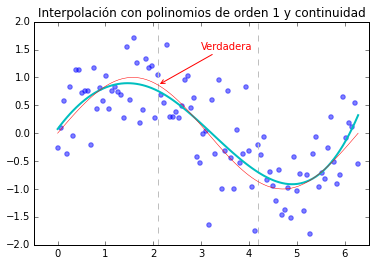

In [51]:
# Splines cúbicos

plt.scatter(x,y, color='b',alpha=0.5)
# las líneas divisorias
plt.plot([pctiles[0],pctiles[0]],[-2,2],ls='--', color='0.75')
plt.plot([pctiles[1],pctiles[1]],[-2,2],ls='--', color='0.75')
plt.axis([-0.5,6.5,-2,2])
plt.title(u'Interpolación con polinomios de orden 1 y continuidad')
# Construyamos las nuevas bases
dum_1 = x>=pctiles[0]
dum_2 = x>=pctiles[1]
x = x.reshape((N,1))
x_pos1 = dum_1*(x-pctiles[0])**3
x_pos2 = dum_2*(x-pctiles[1])**3

xmat = np.concatenate((np.ones((N,1)),x, np.power(x,2), np.power(x,3),
                       x_pos1, x_pos2), axis=1)
olsx = ols.ols_dan(y,xmat)

plt.plot(x,olsx.yest(), color='c', lw=2)
plt.plot(x,np.sin(x), color='r', lw=0.5)
plt.annotate("Verdadera",
            xy=(2.1, np.sin(2.1)), xycoords='data',
            xytext=(3, 1.5), color='r',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", ec='r'),
            )

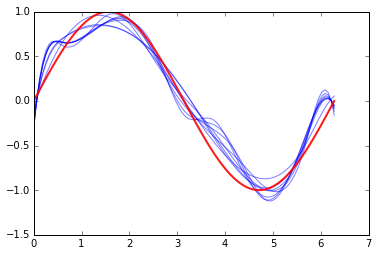

In [71]:
# Qué pasa si aproximamos con más nodos?
for kk in range(2,10):
    K = kk
    nod_grid = np.percentile(x, np.linspace(10, 90, K))
    # generamos las funciones
    xpos_mat = np.zeros((N,K))
    for k in range(K):
        xpos_mat[:,k] = ((x>nod_grid[k])*(x-nod_grid[k])**3).flatten()

    # lo demás es igual
    xmat = np.concatenate((np.ones((N,1)),x, np.power(x,2), np.power(x,3),
                           xpos_mat), axis=1)
    olsx = ols.ols_dan(y,xmat)

    plt.plot(x,olsx.yest(), color='b', lw=1, alpha=0.5)

plt.plot(x,np.sin(x), color='r', lw=2, alpha=0.9)

# Modelos Aditivos Generalizados (GAMS)

*  Un GAM tiene la siguiente forma:

$$
E(y|X) = \alpha_0 + f_1(x_1) + f_2(x_2) + \cdots f_p(x_p) + \epsilon 
$$


* El caso de regresión lineal es uno donde $f_k(x_k) = \alpha_k x_k$.


* Así que estos modelos son más generales y pueden capturar relaciones no lineales que son difíciles de capturar con expansiones polinomiales.


* **No conocemos** las funciones $f_k()$, aunque impondremos que sean *suaves* (continuamente diferenciables).


* Podríamos aproximar cada función $f_k(x_k) = \sum_m b_m h_m(x_k)$, y estimar los coeficientes por OLS.


* Vamos a utilizar un método diferente: queremos estimar simultáneamente las funciones, teniendo en cuenta que cada una captura el efecto *neto* del regresor correspondiente sobre $y$.

# Algoritmo de Backfitting para GAMS

1. Inicializamos las funciones que queremos estimar:
$$
\hat{\alpha} = \bar{y}\\
\hat{f}_j = 0 \hspace{2mm} \text{para todo $j$}
$$

2. Repetir para $j=1,2, \cdots, p, 1,2, \cdots, p, \cdots$ hasta converger:

$$
\hat{f_j}  \leftarrow \mathcal{S}_j \left[y_i - \hat{\alpha} - \sum_{k \neq j} \hat{f}_k(x_{ik}) \right] \\
\hat{f_j} \leftarrow  \hat{f_j} - \frac{1}{N}\sum_{i} \hat{f}_j(xij)
$$



# Backfitting para GAMS en palabras


* Queremos estimar simultáneamente el parámetro $\alpha$ y las funciones.


* Forzamos a que $\hat{\alpha}$ sea el promedio de la variable dependiente:

> Esto explica la segunda parte del segundo paso: para que $\hat{\alpha} = \bar{y}$ es necesario $\bar{f_j} = 0$ para todo $j$.


* Vamos a utilizar la estimación actual como si fuera óptima:
    
    * Obtenemos los residuos *excluyendo* la j-ésima función: $r_{-j}$
    
    * Utilizamos un *scatterplot smoother* de la relación entre $r_{-j}$ y $x_j$.
    

# ¿Qué es un *scatterplot smoother*?


* Primero: qué es un scatterplot?

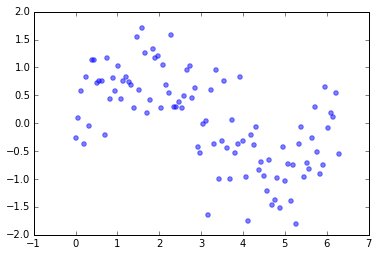

In [72]:
plt.scatter(x,y, color='b',alpha=0.5)


# Segundo: dado un scatterplot, que es un *smoother*?


* Justo eso: tenemos una relación entre $y$ y $x$.


* Un smoother no es más que una función que suaviza esta relación.


* En estas notas ya vimos una: **splines cúbicos**.


* Se les ocurre otra?  OLS.  Ya entendemos por qué aprendimos a utilizar esa *primera versión de un algoritmo de backfitting* hace varias clases.  

In [81]:
# Creemos una función:
def spline_smoother(y,x,K):
    '''
    Cubic-spline smoother.
    y: variable dendiente
    x: variable independiente
    K: número de nodos para hacer 
    '''
    N = y.shape[0]
    y = y.reshape((N,1))
    x = x.reshape((N,1))
    # grid
    nod_grid = np.percentile(x, np.linspace(10, 90, K))
    # matriz con partes positivas
    xpos_mat = np.zeros((N,K))
    for k in range(K):
        xpos_mat[:,k] = ((x>nod_grid[k])*(x-nod_grid[k])**3).flatten()

    # Estamos listos para concatenar
    xmat = np.concatenate((np.ones((N,1)),x, np.power(x,2), np.power(x,3),
                           xpos_mat), axis=1)
    # estimamos
    olsx = ols.ols_dan(y,xmat)
    # lo único que necesitamos es el yest
    yest = np.asarray(olsx.yest())
    return yest, x


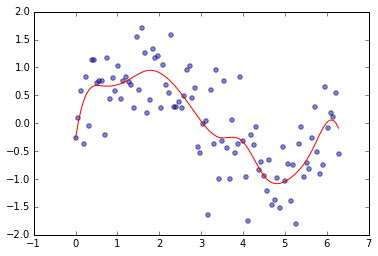

In [90]:
# probemos que funciona:
ycub, xcub = spline_smoother(y,x,10)
plt.scatter(x,y, alpha=0.5)
plt.plot(xcub, ycub, color='r')

In [93]:
# importemos los datos
data = pd.read_csv(u'D:\\Míos\\Clase CIDE\\Datasets\\Credit.csv')
data.head(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [118]:
# Utilicemos sólamente variables continuas
# primero organicemos los datos: las variables cuantitativas están bien.  Las cualitativas toca transformarlas
N = data.shape[0]
dum_hombre     = np.asarray(data.Gender == ' Male').reshape((N,1))
dum_estudiante = np.asarray(data.Student == 'Yes').reshape((N,1))
dum_casado     = np.asarray(data.Married == 'Yes').reshape((N,1))
# Para etnicidad debemos excluir una variable que sirva como referencia:
# tenemos tres categorías: vamos a excluir la tercera: "African American"
print data.Ethnicity.unique()
dum_ethnic = np.asarray(pd.get_dummies(data.Ethnicity).iloc[:,:-1])
# etiquetas de X
labs_x = np.array(['Score','Ingreso',u'Límite de Crédito',u'Número Tarjetas','Edad',u'Educación'])
#,'Hombre','Estudiante','Casado','Caucasian','Asian'])
# incluyamos todas las variables:
prexmat = np.concatenate((
                        np.asarray(data.Rating).reshape((N,1)),
                        np.asarray(data.Income).reshape((N,1)),
                         np.asarray(data.Limit).reshape((N,1)),
                         np.asarray(data.Cards).reshape((N,1)),
                         np.asarray(data.Age).reshape((N,1)),
                         np.asarray(data.Education).reshape((N,1)),
                         ),axis=1)
saldo = np.asarray(data.Balance).reshape((N,1))
print prexmat.shape
nvar = prexmat.shape[1]


['Caucasian' 'Asian' 'African American']
(400L, 6L)


In [ ]:
# Listos para programar el backfitting:
# inicicialicemos la distancia
dist = 1
Diff    = [1]
crit = 0.01
# Inicializamos las funciones a cero
Fmat = np.zeros((N,7))
# la primera será la constante
Fmat[:,0] = np.nanmean(saldo)*np.ones((N))
while dist>crit:
    # Actualicemos versión anterior de funciones
    old_func = Fmat.copy()
    # Ahora:
    # 1. Residuos exluyendo k
    # 2. Smoother
    # 3. Media cero y guardar
    for i in range(1,7):
        # Excluyamos i
        ind_i = np.setdiff1d(range(7),np.array([i]))
        # Obtengamos residuos
        # Fácil: es un modelo aditivo!
        res_i = saldo - Fmat[:,ind_i].sum(axis=1).reshape((N,1))
        # Smoother: 2 nodos
        K = 2
        f_i,xl_i   = spline_smoother(res_i,prexmat[:,i-1].reshape((N,1)),K)
        Fmat[:,i]  = f_i.flatten()
    # Acabamos iteración actual
    # 1. medias:
    Fmat[:,1:] -= np.nanmean(Fmat[:,1:],axis=0).reshape((1,nvar))
    # Compute square distances across columns and use the max
    dist = ((Fmat[:,1:]-old_func[:,1:])**2).sum(axis=0).max()
    Diff.append(dist)

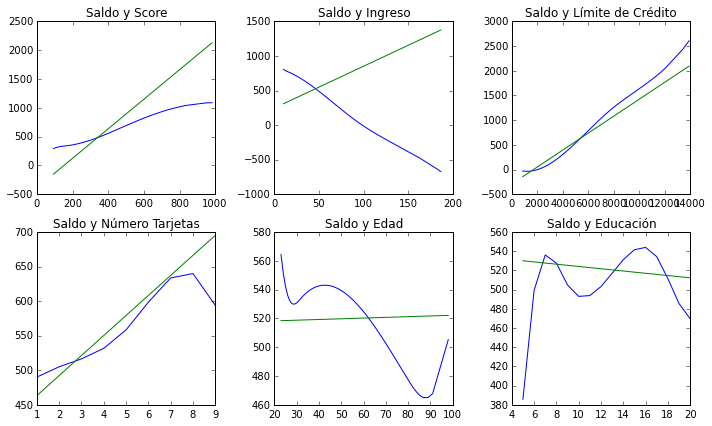

In [124]:
plt.figure(figsize=(10,6))
for k in range(6):
    plt.subplot(2,3,k+1)
    # organicemos primero
    predata = pd.DataFrame(np.concatenate((prexmat[:,k].reshape((N,1)), Fmat[:,k+1].reshape((N,1))),axis=1), columns=['x','fx']
                          ).sort(columns='x',ascending=True)
    plt.plot(predata.x, saldo.mean() + predata.fx)
    # para referencia grafiquemos ols:
    olsk = ols.ols_dan(saldo, np.concatenate((np.ones((N,1)),prexmat[:,k].reshape((N,1))),axis=1))
    predata = pd.DataFrame(np.concatenate((prexmat[:,k].reshape((N,1)), olsk.yest()),axis=1), columns=['x','yhat']
                          ).sort(columns='x',ascending=True)
    plt.plot(predata.x,predata.yhat)
    tit_txt = u'Saldo y ' + labs_x[k]
    plt.title(tit_txt)
plt.tight_layout()
